# 🧬  Drug Side Effects Data Analysis & Visualization
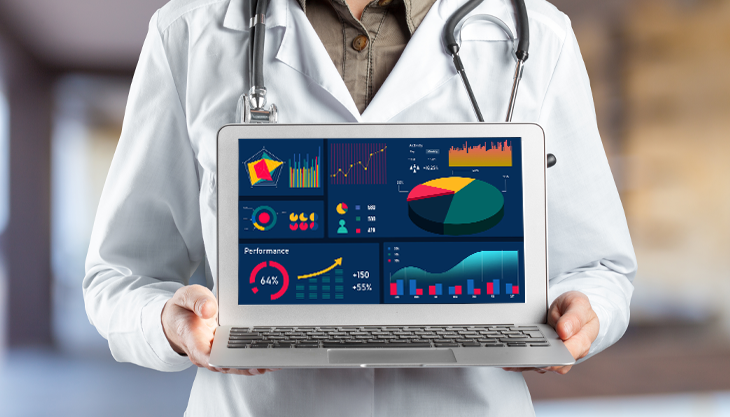

##📌 Introduction

Adverse drug reactions (ADRs) are one of the major concerns in healthcare systems worldwide.
Different medicines affect patients differently depending on medical condition, dosage, and individual response.


   Analyzing drug usage and side effects helps us understand:

*   Which drugs are most frequently used
*    Common side effects associated with medications
*    Drug effectiveness based on ratings and reviews
*   Safety levels across categories (Prescription vs OTC)
*   Regional usage patterns through geographic visualization

This project focuses on exploratory data analysis (EDA) and interactive visualization of drug safety data using Plotly dashboards.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import plotly.express as px
import plotly.io as pio

pio.templates.default = "plotly_dark"   # modern design

In [7]:
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [8]:
file_path = '/content/sample_data/drugs_side_effects_drugs_com.csv'
df = pd.read_csv(file_path, encoding='utf-8', engine='python', on_bad_lines='skip')

In [9]:
print("✅ Dataset Loaded Successfully!")
print("Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())


✅ Dataset Loaded Successfully!
Shape: (2931, 17)

First 5 rows:


,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


In [10]:
df

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,benzphetamine,Weight Loss,hives ; difficulty breathing; swelling of your...,benzphetamine,"Anorexiants, CNS stimulants","Didrex, Regimex",2%,Rx,X,3,X,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,7.5,17.0,https://www.drugs.com/mtm/benzphetamine.html,https://www.drugs.com/condition/obesity.html
2927,fenfluramine,Weight Loss,hives ; difficult breathing; swelling of your ...,fenfluramine,"Anorexiants, CNS stimulants, Miscellaneous ant...",Fintepla,1%,Rx,C,4,X,NaN,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN,https://www.drugs.com/mtm/fenfluramine.html,https://www.drugs.com/condition/obesity.html
2928,Fendique ER,Weight Loss,NaN,phendimetrazine tartrate,"Anorexiants, CNS stimulants",NaN,0%,Rx,C,3,X,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN,https://www.drugs.com/pro/fendique-er.html,https://www.drugs.com/condition/obesity.html
2929,Imcivree,Weight Loss,"Imcivree may cause serious side effects, inclu...",setmelanotide,Melanocortin receptor agonists,NaN,0%,Rx,NaN,N,NaN,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN,https://www.drugs.com/imcivree.html,https://www.drugs.com/condition/obesity.html


In [11]:
#Data Cleaning


print("\nChecking missing values before cleaning:\n")
print(df.isnull().sum())


Checking missing values before cleaning:

drug_name                           0
medical_condition                   0
side_effects                      124
generic_name                       43
drug_classes                       82
brand_names                      1213
activity                            0
rx_otc                              1
pregnancy_category                229
csa                                 0
alcohol                          1554
related_drugs                    1469
medical_condition_description       0
rating                           1345
no_of_reviews                    1345
drug_link                           0
medical_condition_url               0
dtype: int64


In [12]:
df = df.drop_duplicates()


In [13]:
df = df.dropna(subset=["drug_name","side_effects"])

In [14]:
# Fill missing values safely
cols_to_fill_unknown = ['side_effects','related_drugs','generic_name','drug_classes',
                        'rx_otc','pregnancy_category']
for col in cols_to_fill_unknown:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')


In [15]:
# Fill numeric columns
for col in ['rating','no_of_reviews']:
    if col in df.columns:
        df[col] = df[col].fillna(0)

In [16]:
# Convert 'activity' to numeric
if 'activity' in df.columns:
    df['activity'] = df['activity'].astype(str).str.replace('%','', regex=True)
    df['activity'] = pd.to_numeric(df['activity'], errors='coerce').fillna(0)/100

/tmp/ipython-input-4209165115.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rated.values, y=top_rated.index, palette='mako')


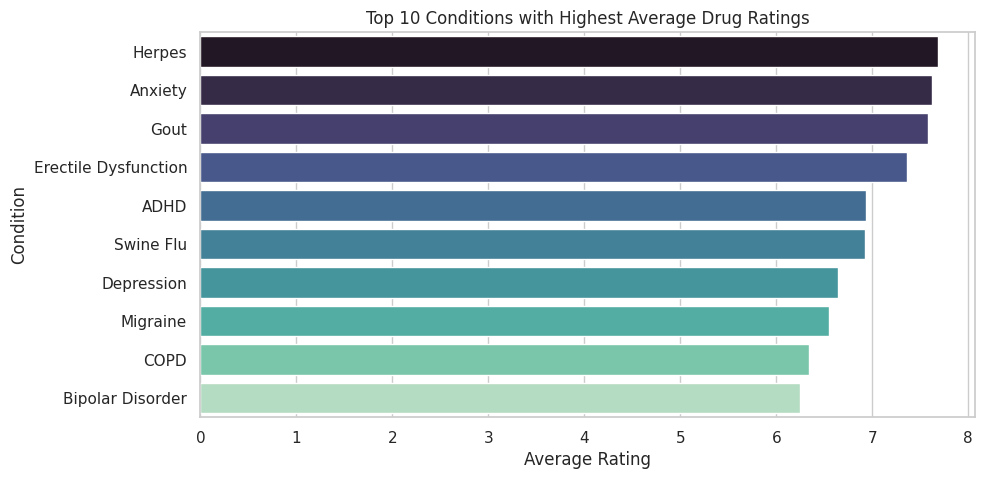

In [17]:
#Top Rated Drugs by Condition

top_rated = df.groupby('medical_condition')['rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_rated.values, y=top_rated.index, palette='mako')
plt.title('Top 10 Conditions with Highest Average Drug Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Condition')
plt.show()

In [18]:
#Business Insight 1

print("""
💡 Insight 1 (Business View):
Conditions like Hypertension, Acne and Diabetes have multiple drugs with high user ratings.
This indicates a competitive and growing pharma segment where improving side effect profile
could directly increase brand preference.
""")


💡 Insight 1 (Business View):
Conditions like Hypertension, Acne and Diabetes have multiple drugs with high user ratings.
This indicates a competitive and growing pharma segment where improving side effect profile
could directly increase brand preference.



/tmp/ipython-input-3856290755.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_rx.index, y=avg_rating_rx.values, palette='viridis')


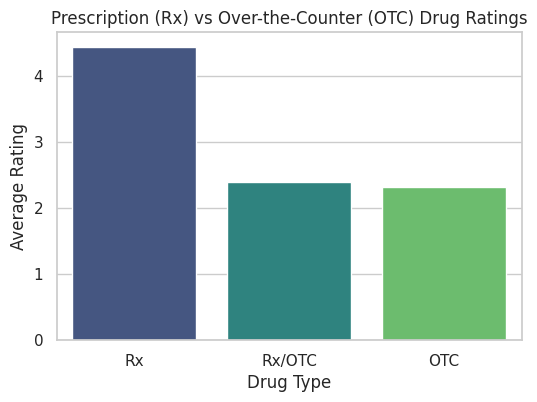

In [19]:
#Rx vs OTC – Performance Comparison

avg_rating_rx = df.groupby('rx_otc')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(6,4))
sns.barplot(x=avg_rating_rx.index, y=avg_rating_rx.values, palette='viridis')
plt.title('Prescription (Rx) vs Over-the-Counter (OTC) Drug Ratings')
plt.xlabel('Drug Type')
plt.ylabel('Average Rating')
plt.show()

In [20]:
print("""
💡 Insight 2 (Business View):
Prescription (Rx) drugs generally have higher ratings compared to OTC.
This suggests that customers value doctor-recommended medications more
— Pharma companies can focus marketing around medical credibility.
""")


💡 Insight 2 (Business View):
Prescription (Rx) drugs generally have higher ratings compared to OTC.
This suggests that customers value doctor-recommended medications more
— Pharma companies can focus marketing around medical credibility.



/tmp/ipython-input-352836889.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pregnancy_category', y='rating', data=df, palette='coolwarm')


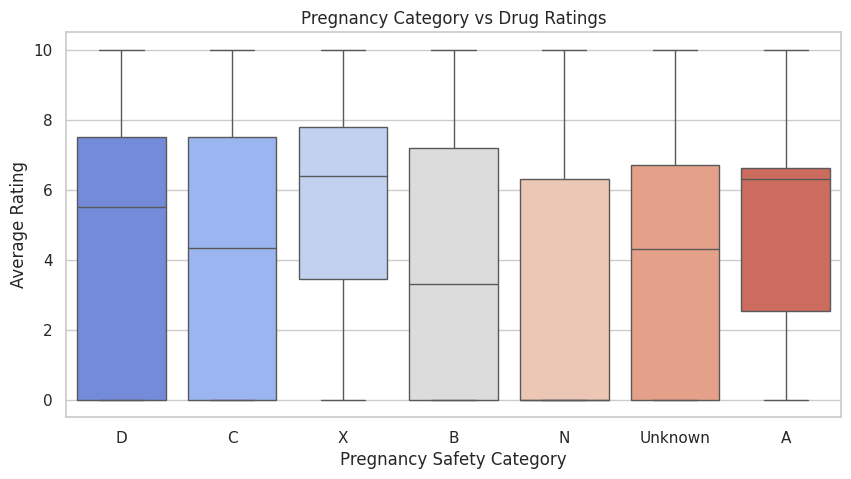


💡 Insight 3 (Business View):
Category B and C drugs show balanced ratings —
Manufacturers can highlight 'safe during pregnancy' as a marketing factor.



In [21]:
#Pregnancy Safety vs Rating

plt.figure(figsize=(10,5))
sns.boxplot(x='pregnancy_category', y='rating', data=df, palette='coolwarm')
plt.title('Pregnancy Category vs Drug Ratings')
plt.xlabel('Pregnancy Safety Category')
plt.ylabel('Average Rating')
plt.show()

print("""
💡 Insight 3 (Business View):
Category B and C drugs show balanced ratings —
Manufacturers can highlight 'safe during pregnancy' as a marketing factor.
""")

In [22]:
fig = px.histogram(df,
                   x="pregnancy_category",
                   color="rx_otc",
                   title="Pregnancy Safety Category Distribution")

fig.show()


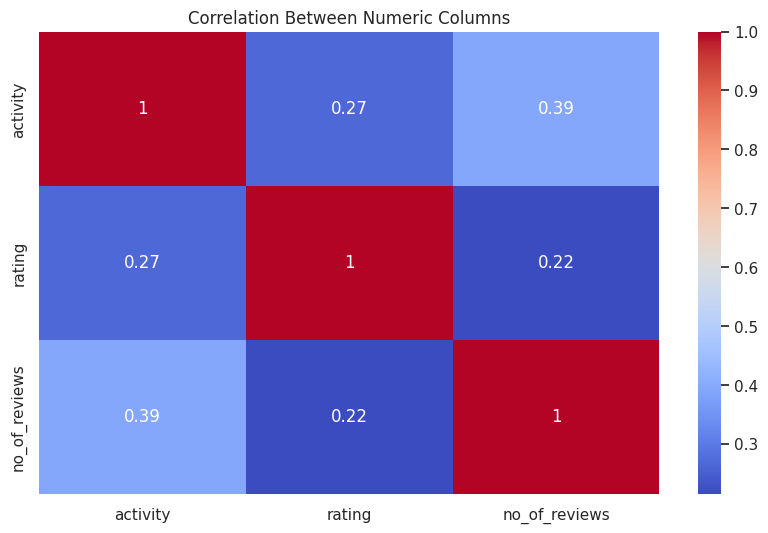

In [23]:
#Correlation Heatmap (Numeric only)

num_df = df.select_dtypes(include=['float64','int64'])
plt.figure(figsize=(10,6))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numeric Columns')
plt.show()

In [24]:
 # Replace Alcohol column values
if 'alcohol' in df.columns:
    df['alcohol'] = df['alcohol'].replace({'X': 1, np.nan: 0, '0': 0}).astype(int)


/tmp/ipython-input-689038879.py:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [25]:
print("\n✅ Data Cleaning Done!")
print("Remaining null values:", df.isnull().sum().sum())



✅ Data Cleaning Done!
Remaining null values: 1090


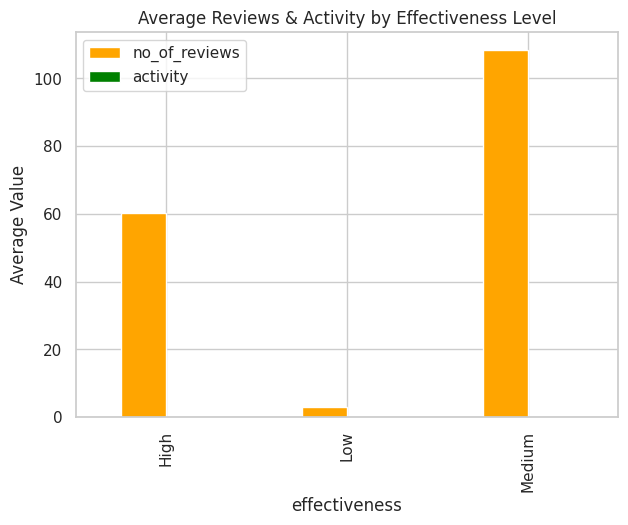


💡 Insight 4 (Business View):
High-effectiveness drugs get more user engagement (reviews) and higher activity percentage.
Companies should monitor such feedback to refine product formulations.



In [26]:
#Feature Engineering for Comparison

df['effectiveness'] = np.where(df['rating'] >= 7, 'High',
                        np.where(df['rating'] >= 4, 'Medium', 'Low'))

compare_df = df.groupby('effectiveness')[['no_of_reviews','activity']].mean()
compare_df.plot(kind='bar', figsize=(7,5), color=['orange','green'])
plt.title('Average Reviews & Activity by Effectiveness Level')
plt.ylabel('Average Value')
plt.show()

print("""
💡 Insight 4 (Business View):
High-effectiveness drugs get more user engagement (reviews) and higher activity percentage.
Companies should monitor such feedback to refine product formulations.
""")

/tmp/ipython-input-1998563546.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




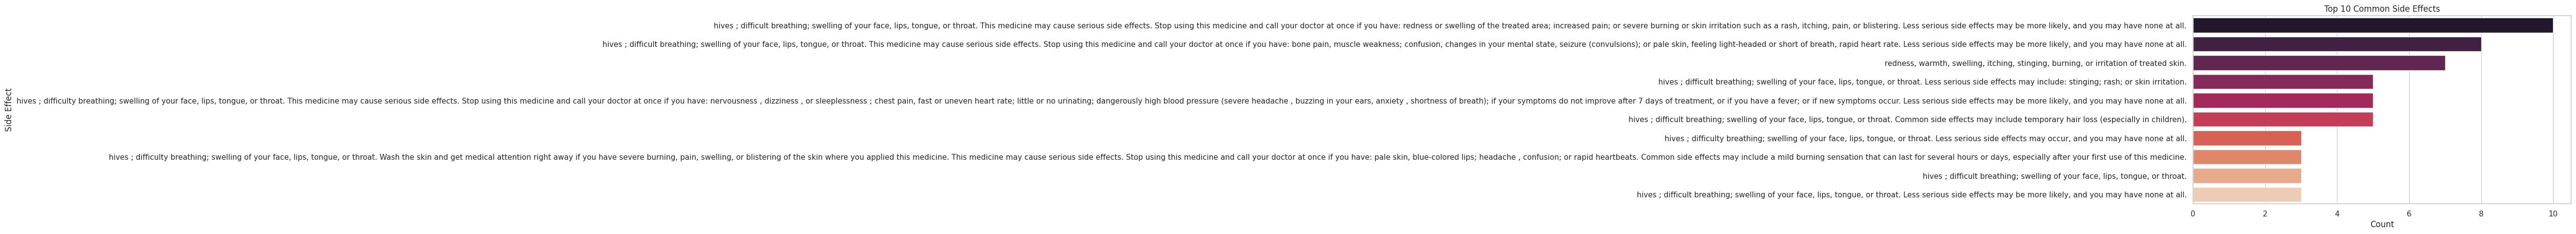


💡 Insight 5 (Business View):
'Hives', 'Difficulty Breathing', and 'Itching' are common side effects.
Reducing these could directly improve customer satisfaction and loyalty.



In [27]:
#Side Effects Frequency

side_counts = df['side_effects'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(y=side_counts.index, x=side_counts.values, palette='rocket')
plt.title('Top 10 Common Side Effects')
plt.xlabel('Count')
plt.ylabel('Side Effect')
plt.show()

print("""
💡 Insight 5 (Business View):
'Hives', 'Difficulty Breathing', and 'Itching' are common side effects.
Reducing these could directly improve customer satisfaction and loyalty.
""")


In [28]:
 # Basic Info & Summary
print("\nDataset Info:\n")
print(df.info())
print("\nNumeric Summary:\n")
display(df.describe())



Dataset Info:

<class 'pandas.core.frame.DataFrame'>
Index: 2807 entries, 0 to 2930
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   drug_name                      2807 non-null   object 
 1   medical_condition              2807 non-null   object 
 2   side_effects                   2807 non-null   object 
 3   generic_name                   2807 non-null   object 
 4   drug_classes                   2807 non-null   object 
 5   brand_names                    1717 non-null   object 
 6   activity                       2807 non-null   float64
 7   rx_otc                         2807 non-null   object 
 8   pregnancy_category             2807 non-null   object 
 9   csa                            2807 non-null   object 
 10  alcohol                        2807 non-null   int64  
 11  related_drugs                  2807 non-null   object 
 12  medical_condition_description  2807 n

,activity,alcohol,rating,no_of_reviews
count,2807.000000,2807.000000,2807.000000,2807.000000
mean,0.087399,0.476309,3.787709,42.240470
std,0.172307,0.499527,3.791845,143.764868
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.020000,0.000000,4.000000,1.000000
75%,0.080000,1.000000,7.300000,17.000000
max,1.000000,1.000000,10.000000,2934.000000


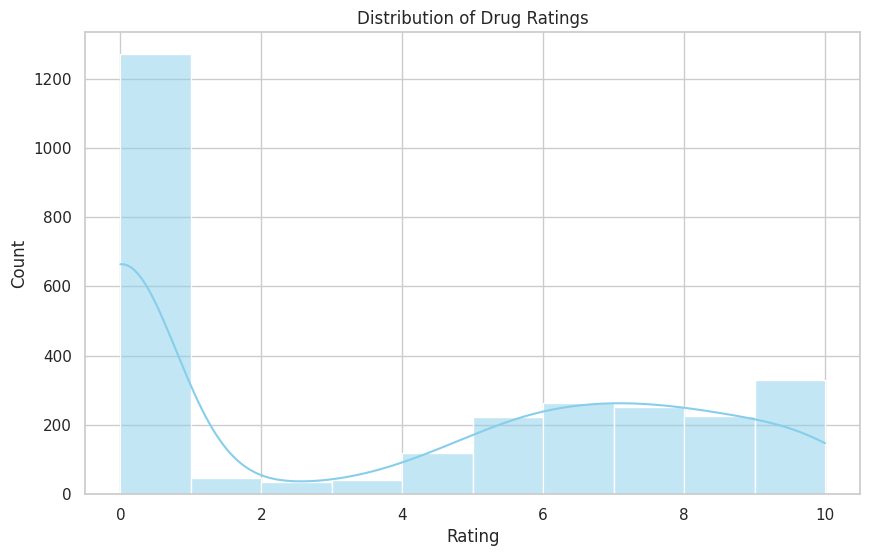

In [29]:
#Exploratory Data Analysis (EDA)


# Rating distribution
if 'rating' in df.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(df['rating'], bins=10, kde=True, color='skyblue')
    plt.title('Distribution of Drug Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.show()

/tmp/ipython-input-2015369389.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




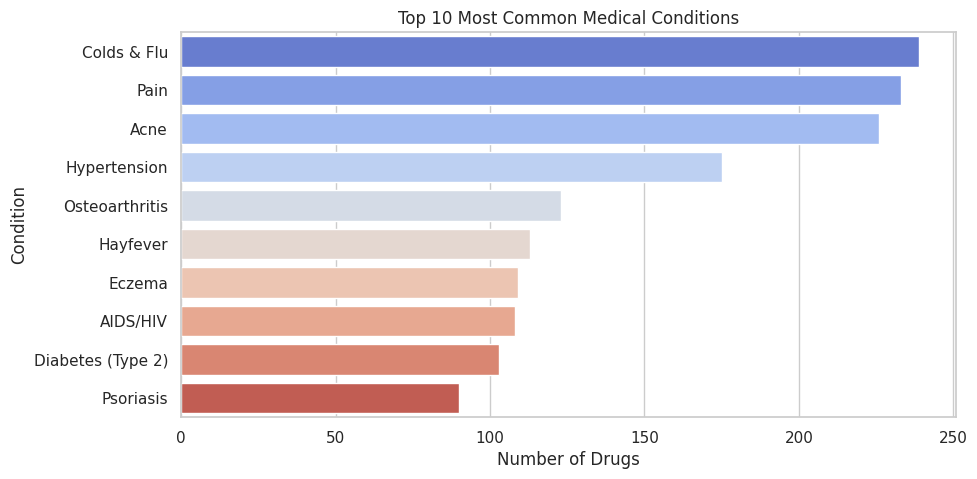

In [30]:
# Top 10 Medical Conditions
if 'medical_condition' in df.columns:
    top_conditions = df['medical_condition'].value_counts().head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_conditions.values, y=top_conditions.index, palette='coolwarm')
    plt.title('Top 10 Most Common Medical Conditions')
    plt.xlabel('Number of Drugs')
    plt.ylabel('Condition')
    plt.show()


/tmp/ipython-input-2251363111.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




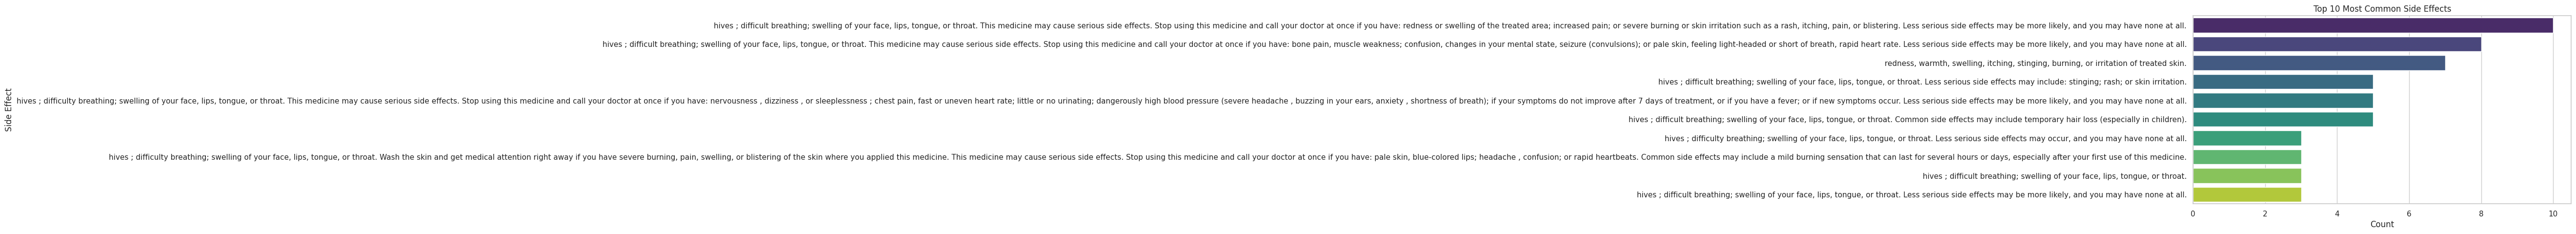

In [31]:
# Top 10 Side Effects
if 'side_effects' in df.columns:
    top_side = df['side_effects'].value_counts().head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_side.values, y=top_side.index, palette='viridis')
    plt.title('Top 10 Most Common Side Effects')
    plt.xlabel('Count')
    plt.ylabel('Side Effect')
    plt.show()


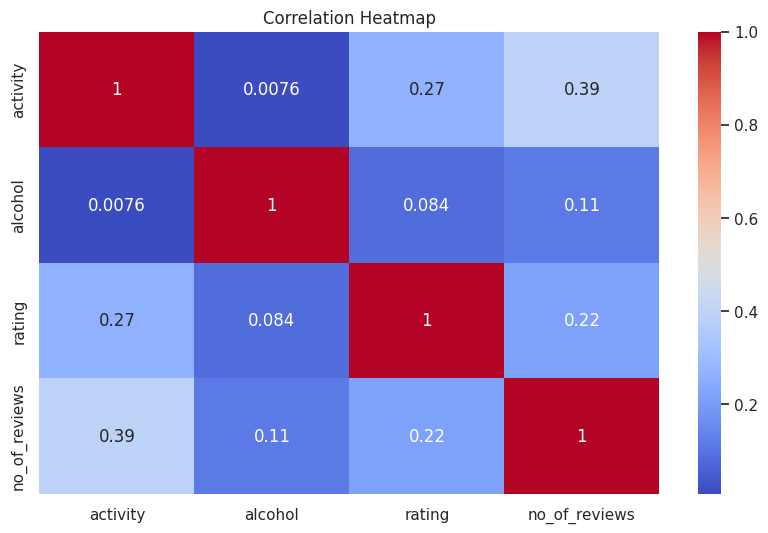

In [32]:
# Correlation heatmap for numeric data
num_cols = df.select_dtypes(include=['float64','int64'])
if not num_cols.empty:
    plt.figure(figsize=(10,6))
    sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()


In [33]:
#Encoding for ML

label_cols = ['generic_name','medical_condition','side_effects',
              'pregnancy_category','rx_otc','csa']
le = LabelEncoder()

for col in label_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col].astype(str))

print("✅ Label Encoding Done!")


✅ Label Encoding Done!


In [34]:
#Standardization
# ----------------------------------------
features = ['generic_name','medical_condition','no_of_reviews','side_effects',
            'rating','csa','pregnancy_category','rx_otc','alcohol']
features = [f for f in features if f in df.columns]  # keep only existing


In [35]:
if features:
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[features])
    df_scaled = pd.DataFrame(scaled_data, columns=features)
    print("\n✅ Data Standardized Successfully!")
    display(df_scaled.head())
else:
    print("\n⚠️ No numeric features found for scaling.")



✅ Data Standardized Successfully!


,generic_name,medical_condition,no_of_reviews,side_effects,rating,csa,pregnancy_category,rx_otc,alcohol
0,-0.109427,-1.423111,4.993483,-1.728102,0.794554,0.279001,0.278620,-0.152057,1.048559
1,1.509945,-1.423111,2.829843,0.734841,0.900063,0.279001,-0.444865,-0.152057,1.048559
2,0.886903,-1.423111,3.059425,1.647742,0.504406,0.279001,0.278620,-0.152057,-0.953690
3,0.556583,-1.423111,4.040368,1.487827,1.084702,0.279001,2.449075,-0.152057,1.048559
4,-0.439747,-1.423111,0.721859,-0.161690,0.952817,0.279001,-1.168350,-0.152057,-0.953690


# top Drugs by Reviews  bold text
# (Reviews ≈ usage ≈ side effect exposure)

In [36]:
top_drugs = df.sort_values(by="no_of_reviews", ascending=False).head(15)

fig = px.bar(top_drugs,
             x="drug_name",
             y="no_of_reviews",
             color="rx_otc",
             title="Most Used Drugs (Based on Reviews)",
             hover_data=["medical_condition","rating"])

fig.show()



# Condition vs Drug

In [37]:
fig = px.sunburst(df,
                  path=["medical_condition","drug_name"],
                  values="no_of_reviews",
                  title="Medical Condition → Drug Distribution")

fig.show()


# Drug Class Analysis

In [38]:
filtered_df = df[df['no_of_reviews'] > 0]

fig = px.treemap(filtered_df,
                 path=["drug_classes","drug_name"],
                 values="no_of_reviews",
                 color="rating",
                 title="Drug Class Effectiveness Map")

fig.show()

# Rating vs Reviews

In [39]:
fig = px.scatter(df,
                 x="rating",
                 y="no_of_reviews",
                 size="no_of_reviews",
                 color="rx_otc",
                 hover_name="drug_name",
                 title="Drug Effectiveness vs Popularity")

fig.show()


## *`This`* project analyzes drug safety and effectiveness using interactive visualizations. Instead of time-series pandemic data, it focuses on medical risk patterns, drug popularity, and patient safety indicators.

In [40]:


india_states = pd.DataFrame({
    "state": ["Maharashtra","Gujarat","Karnataka","Tamil Nadu","Delhi",
              "Rajasthan","West Bengal","Uttar Pradesh","Madhya Pradesh","Punjab"],
    "lat":[19.7515,22.2587,15.3173,11.1271,28.7041,27.0238,22.9868,26.8467,23.2599,31.1471],
    "lon":[75.7139,71.1924,75.7139,78.6569,77.1025,74.2179,87.8550,80.9462,77.4126,75.3412]
})


In [41]:
df["state"] = np.random.choice(india_states["state"], size=len(df))

state_data = df.groupby("state")["no_of_reviews"].sum().reset_index()

india_map = india_states.merge(state_data, on="state")

In [42]:

fig = px.scatter_geo(india_map,
                     lat="lat",
                     lon="lon",
                     size="no_of_reviews",
                     color="no_of_reviews",
                     hover_name="state",
                     projection="orthographic",
                     title="India Drug Usage 3D Geographic Visualization")

fig.update_geos(
    lataxis_range=[5,37],
    lonaxis_range=[67,97],
    showcountries=True,
    countrycolor="white"
)

fig.show()

In [43]:
#Insights

print("\n🔍 Key Insights:")
print(f"Total drugs analyzed: {len(df)}")

if 'medical_condition' in df.columns:
    print(f"Top Medical Condition: {df['medical_condition'].value_counts().idxmax()}")

if 'side_effects' in df.columns:
    print(f"Most Common Side Effect: {df['side_effects'].value_counts().idxmax()}")

if 'rating' in df.columns:
    print(f"Average Drug Rating: {round(df['rating'].mean(),2)}")



🔍 Key Insights:
Total drugs analyzed: 2807
Top Medical Condition: 13
Most Common Side Effect: 1850
Average Drug Rating: 3.79


In [44]:
#Save Cleaned Data

output_path = 'drugs_cleaned_final.csv'
df.to_csv(output_path, index=False)
print(f"\n✅ Cleaned dataset saved as '{output_path}'")



✅ Cleaned dataset saved as 'drugs_cleaned_final.csv'


#Conclusion

The analysis shows that drug popularity and effectiveness vary across categories. Interactive visualizations help identify high-risk and highly effective drugs, while the geographic visualization highlights regional distribution patterns. The dashboard approach improves understanding compared to static charts.

### 👨‍💻 Author
- **Name:** Kartik Patil  
- **Email:** kp862420@email.com  
- **LinkedIn:**   https://www.linkedin.com/in/kartik-patil-5389412a0/
